# Machine Learning Assignment 2

In [1]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
diabetes.data.shape
#442 Samples and 10 features included

(442, 10)

In [2]:
print (diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

## Lasso model - sklearn default dataset (Test 1)

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(diabetes.data, diabetes.target, random_state=2406)

In [4]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, Y_train) #Default lasso alpha=1.0 max_iter=1000
# Training R^2
lasso.score(X_train, Y_train)

0.4069799701804221

In [5]:
# Test R^2
lasso.score(X_test, Y_test)

0.2292433392265275

The accuracy of a KNeighborsRegressor is measured in scikit-learn by R^2
For all classifiers score returns one minus the test error rate, and for all regressors score returns R2
KNeighborsRegressor.score

In [6]:
# Number of features used
import numpy as np
print (np.sum(lasso.coef_ !=0))
# Features
features = load_diabetes()['feature_names']
alpha = np.abs(lasso.coef_)
print ("Features used",np.array(features)[alpha > 0])
print ("Features not used",np.array(features)[alpha == 0])

2
Features used ['bmi' 's5']
Features not used ['age' 'sex' 'bp' 's1' 's2' 's3' 's4' 's6']


In [7]:
alpha

array([  0.        ,   0.        , 436.81182568,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
       323.2728372 ,   0.        ])

## Lasso model - Original dataset (Test 2)

In [8]:
#Import samples and labels, removing header
label = np.genfromtxt("diabetes.data", delimiter="", usecols=-1, skip_header=1, dtype='int') 
data = np.genfromtxt("diabetes.data", delimiter="", usecols=[*range(0,10)], skip_header=1, dtype='float') 

In [9]:
# Verify with file
print (label[:1])
print (data[:1])

[151]
[[ 59.       2.      32.1    101.     157.      93.2     38.       4.
    4.8598  87.    ]]


In [10]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(data, label, random_state=2406) #Default 3:1 split

In [11]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X2_train, Y2_train) #Default lasso alpha=1.0 max_iter=1000
# Training R^2
print("Training set score =", lasso.score(X2_train, Y2_train))
print("Test set score =", lasso.score(X2_test, Y2_test))

Training set score = 0.5461480338127306
Test set score = 0.32034257541676436


In [12]:
print (np.sum(lasso.coef_ !=0))
# Features
features = load_diabetes()['feature_names']
alpha = np.abs(lasso.coef_)
print ("Features used",np.array(features)[alpha > 0])
print ("Features not used",np.array(features)[alpha == 0])

10
Features used ['age' 'sex' 'bmi' 'bp' 's1' 's2' 's3' 's4' 's5' 's6']
Features not used []


In [13]:
alpha

array([1.11735124e-01, 1.78695977e+01, 6.33924787e+00, 9.29604509e-01,
       2.32985467e-02, 1.37662251e-01, 1.09785137e+00, 2.16083195e+00,
       3.75979578e+01, 3.27175549e-01])

All 10 features used in Lasso of Original dataset, compared to the 3 in sklearn ver(Test 1). As we read all 10 columns from the .data file

Test 1 scored poorley in both training and test set evaluation.

Test 2 dataset has improved in both the training and test set scores, however has a lower test set score compared to training set showing potential overfitting.

## Preprocessing datasets (Test 3)

In [14]:
X3_train, X3_test, Y3_train, Y3_test = train_test_split(data, label, random_state=2406) #Default 3:1 split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X3_train)

StandardScaler()

In [15]:
# Normalising dataset
X3_trainsc = scaler.transform(X3_train)
X3_testsc = scaler.transform(X3_test)
# Print dataset properties before and after scaling
print(X3_train.shape)
print (X3_trainsc.shape)

print (X3_train.min(axis=0))
print (X3_train.max(axis=0))
print (X3_trainsc.min(axis=0))
print (X3_trainsc.max(axis=0))

(331, 10)
(331, 10)
[19.      1.     18.1    62.     97.     41.6    22.      2.      3.2581
 58.    ]
[ 79.      2.     42.2   131.    301.    242.4    99.      9.09    6.107
 124.   ]
[-2.26713706 -0.91034569 -1.82405515 -2.39115789 -2.66138308 -2.42912321
 -2.18857565 -1.59895094 -2.54234956 -2.83893622]
[2.33621046 1.0984838  3.45423786 2.69279366 3.27307406 4.2163807
 3.90296389 3.93230211 2.74417155 2.77825431]


In [16]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X3_trainsc, Y3_train) #Default lasso alpha=1.0 max_iter=1000
# Training R^2
print("Training set score =", lasso.score(X3_trainsc, Y3_train))
print("Test set score =", lasso.score(X3_testsc, Y3_test))

Training set score = 0.547411918915724
Test set score = 0.3254240296029125


In [17]:
print (np.sum(lasso.coef_ !=0))
# Features
features = load_diabetes()['feature_names']
alpha = np.abs(lasso.coef_)
print ("Features used",np.array(features)[alpha > 0])
print ("Features not used",np.array(features)[alpha == 0])

9
Features used ['age' 'sex' 'bmi' 'bp' 's1' 's3' 's4' 's5' 's6']
Features not used ['s2']


Test 3 retains 9 features with only low-density lipoproteins being not used.

A priori expected was that the results would be closer to that of test 1 as the data was normalised for this dataset rather than test 2 which kept original data.
However this expectation was not the case with results above for test 3 being more similar to that of test 2, the reason for this was because of the number of features/coefficients used in the model.

As only 2 features are used in test 1 producing poor results with underfitting, however test 3 uses 9 features with is much closer to the amount of features used in the model of test 2. While test 2 shows some overfitting, the decramented number of features seen in test 3 could explain the slight increase in test set score. 

In [18]:
alpha

array([ 0.15416744,  9.55165813, 28.13262239, 11.41696699,  5.08761265,
        0.        , 11.39281903,  2.55625673, 24.29263411,  2.6193905 ])

## Varying regulatization parameter in Lasso

In [19]:
X3_train, X3_test, Y3_train, Y3_test = train_test_split(data, label, random_state=2406) #Default 3:1 split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X3_train)
X3_trainsc = scaler.transform(X3_train)
X3_testsc = scaler.transform(X3_test)

In [20]:
x_axis =np.array([])
y_axis = np.array([])

In [21]:
# for alpha in range(1, 500000, 100): #Actual range (0.0001 ,50, 0.01)
#     alpha/=10000
for alpha in [0.001, 0.01, 0.1 ,1 , 1.5 , 2, 4, 8, 16, 32 , 64, 128 ]:
    # Training on training set
    lasso_graph = Lasso(alpha).fit(X3_trainsc,Y3_train) #Using normalised datasets
    # Apply same lasso to test set for accuracy
    y_axis = np.append(y_axis, lasso_graph.score(X3_testsc, Y3_test)) #Plot test set data
    x_axis = np.append(x_axis, np.sum(lasso_graph.coef_ !=0))

In [22]:
x_axis[3]

9.0

In [23]:
y_axis[3] # Matches with test 3

0.3254240296029125

Text(0.5, 0, 'Number of features')

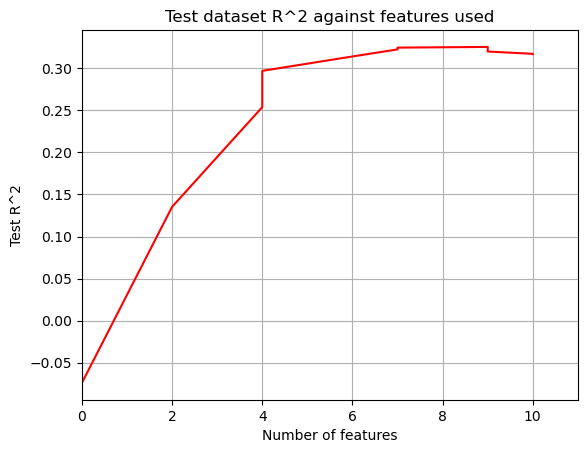

In [24]:
import matplotlib.pyplot as plt
plt.title("Test dataset R^2 against features used")
plt.plot(x_axis,y_axis, 'r')
plt.xlim(0,11)
plt.grid()
plt.ylabel("Test R^2")
plt.xlabel("Number of features")

From looking at the graph obtained of R^2 against number of features, I can infer that the ideal number of features and the best on the point on the curve would be when the number of features is 8 or 9. This is because this is at the peak of the graph meaning it when the Lasso regression model is most accurate and has the highest R^2 value. This is the point at the model is most reliable at classing test samples.

Another reason is that after 9 feautes in the graph the gradient becomes negative and the model actually starts decreasing in R^2 value. The reason for this being that model starts overfitting on the training sample. 
From this a hypothesis can be made the best number of features to use would be 8-9

Another thing that can observed is that general range of alpha values chosen can result in a feature  not having any samples for the graph. Such was the case with the graph seen above as there is no sample for 5 features it results in a double plot for 4.

## Cross-validation to find alpha

In [25]:
# from sklearn.model_selection import cross_val_score
# best_score=0
# best_alpha=0
# for alpha in range(1, 200, 1): #Actual range (0.1 ,20, 0.1)
#     alpha/=10
#     lasso_cross = Lasso(alpha)
#     # Cross validate
#     scores = cross_val_score(lasso_cross, X3_trainsc, Y3_train, cv=5)  #5 Fold cross-val
#     # Compute mean accuracy
#     score = np.mean(scores)
#     print("[",alpha,"]",score)
#     if score > best_score:
#         best_score = score
#         best_alpha = alpha

In [26]:
from sklearn.linear_model import LassoCV
lasso_best = Lasso(max_iter=10000)
# 5 fold cross validatation
lassocv = LassoCV(alphas=None, cv=5, max_iter=10000)
lassocv.fit(X3_trainsc,Y3_train)

LassoCV(cv=5, max_iter=10000)

In [27]:
# Obtain best parameter
lasso_best.set_params(alpha=lassocv.alpha_)
# Rebuild model on full training set
lasso_best.fit(X3_trainsc,Y3_train)

Lasso(alpha=0.19710502546576905, max_iter=10000)

In [28]:
best_alpha = lassocv.alpha_

In [29]:
best_alpha

0.19710502546576905

In [30]:
# Training scores
training_score = lasso_best.score(X3_trainsc, Y3_train)
test_score = lasso_best.score(X3_testsc, Y3_test)
print ("Best regularization parameter found =", best_alpha)
print ("Training set score =", training_score)
print ("Test set score=", test_score)

# Features
print (np.sum(lasso_best.coef_ !=0))
features = load_diabetes()['feature_names']
alpha = np.abs(lasso_best.coef_)
print ("Features used",np.array(features)[alpha > 0])
print ("Features not used",np.array(features)[alpha == 0])

Best regularization parameter found = 0.19710502546576905
Training set score = 0.5522247082231635
Test set score= 0.3212867484172205
10
Features used ['age' 'sex' 'bmi' 'bp' 's1' 's2' 's3' 's4' 's5' 's6']
Features not used []


An interesting observevation made here is that the score given by cross validation is actually lower thatn that of data pre-processing in test 3. This is a clear indication of the test sample overfitting, because while cross validation has a higher training set score than test 3 it has a lower test set score than that of test 3.

Test 3 only uses 9 feautes rather than the 10 favored by the cross validation results. The test set score follows the trend shown in the graph of the alpha value for lasso.
As the extra feature used for the test set score calculation has resulted in a decreased score.

Thus proving the hypothesis before of the "sweet spot" being around 8-9 features

## Inductive Conformal predictor

In [31]:
#Import samples and labels, removing header
label = np.genfromtxt("diabetes.data", delimiter="", usecols=-1, skip_header=1, dtype='int') 
data = np.genfromtxt("diabetes.data", delimiter="", usecols=[*range(0,10)], skip_header=1, dtype='float') 

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(data, label, random_state=2406) #Default 3:1 split
X_train_pr, X_valid, Y_train_pr, Y_valid = train_test_split(X_train,Y_train, random_state=1, test_size = 99)

In [33]:
len(X_valid) # Calibration set size 99

99

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit to training set proper
scaler.fit(X_train_pr)

StandardScaler()

In [35]:
print (X_train_pr.min(axis=0))
print (X_train_pr.max(axis=0))

[ 19.       1.      18.1     62.     113.      51.      28.       2.
   3.2581  60.    ]
[ 79.      2.     42.2   131.    282.    198.6    99.      8.      6.107
 124.   ]


In [36]:
# Apply
X_train_pr = scaler.transform(X_train_pr)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)
print (X_train_pr.min(axis=0))
print (X_train_pr.max(axis=0))

[-2.31686222 -0.90926985 -1.76287348 -2.45519828 -2.25744329 -2.17445964
 -1.74148157 -1.66223872 -2.55786005 -2.74197376]
[2.31154221 1.09978353 3.37611412 2.61984553 2.85932376 2.92061613
 4.02101027 3.26270337 2.71565751 2.70747429]


In [37]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=best_alpha).fit(X_train_pr,Y_train_pr)
predict = lasso.predict(X_valid)

noncon = np.array([])
for i in range (len(predict)):
    # Sort nonconformity scores
    noncon = np.append(noncon, np.abs(predict[i] - Y_valid[i]))

In [38]:
print(noncon[:5])
# Sort nonconformity scores
noncon = np.sort(noncon)
print(noncon[:5])

[  2.24446351   6.34763274  53.8996497  106.40841344  20.22066193]
[0.1949176  0.55870119 0.61746002 0.81398755 2.23448109]


## Significance level 5%

In [39]:
# M = 99
# Significance level 5%
M = 99
s = 0.05
k = np.ceil((1-s)*(M+1))
k = int(k)
c = noncon[k]
print (c)

109.54804886985426


In [40]:
test_predict = lasso.predict(X_test)
error = 0
for n in range (len(test_predict)):
    bottom = test_predict[n]-c
    top = test_predict[n]+c
    print ("Prediction interval = [", bottom, ",", top,"]")
    if Y_test[n] > top or Y_test[n] < bottom :
        error += 1

print ("Error rate", error / len(test_predict))

Prediction interval = [ 153.23826997338398 , 372.3343677130925 ]
Prediction interval = [ 42.34170419572709 , 261.4378019354356 ]
Prediction interval = [ 125.55335522902996 , 344.6494529687385 ]
Prediction interval = [ 49.327985094500775 , 268.4240828342093 ]
Prediction interval = [ -8.475888384638111 , 210.62020935507041 ]
Prediction interval = [ -26.201962259408333 , 192.89413548030018 ]
Prediction interval = [ 54.50010349794118 , 273.59620123764967 ]
Prediction interval = [ 120.17765118024334 , 339.27374891995186 ]
Prediction interval = [ 91.52158449416405 , 310.61768223387253 ]
Prediction interval = [ 178.64531391917643 , 397.74141165888494 ]
Prediction interval = [ 3.0340840315716946 , 222.1301817712802 ]
Prediction interval = [ 26.27328790186587 , 245.36938564157438 ]
Prediction interval = [ 73.26724036550812 , 292.3633381052166 ]
Prediction interval = [ -7.298284325205373 , 211.79781341450314 ]
Prediction interval = [ 48.02056052365896 , 267.11665826336747 ]
Prediction interval =

## Significance level 20%

In [41]:
# M = 99
# Significance level 5%
M = 99
s = 0.2
k = np.ceil((1-s)*(M+1))
k = int(k)
c = noncon[k]
print (c)

77.33593891629744


In [42]:
test_predict = lasso.predict(X_test)
error = 0
for n in range (len(test_predict)):
    bottom = test_predict[n]-c
    top = test_predict[n]+c
    print ("Prediction interval = [", bottom, ",", top,"]")
    if Y_test[n] > top or Y_test[n] < bottom :
        error += 1

print ("Error rate", error / len(test_predict))

Prediction interval = [ 185.4503799269408 , 340.12225775953567 ]
Prediction interval = [ 74.55381414928391 , 229.22569198187878 ]
Prediction interval = [ 157.76546518258678 , 312.4373430151817 ]
Prediction interval = [ 81.5400950480576 , 236.21197288065247 ]
Prediction interval = [ 23.736221568918708 , 178.4080994015136 ]
Prediction interval = [ 6.010147694148486 , 160.68202552674336 ]
Prediction interval = [ 86.712213451498 , 241.38409128409288 ]
Prediction interval = [ 152.38976113380016 , 307.06163896639504 ]
Prediction interval = [ 123.73369444772086 , 278.4055722803157 ]
Prediction interval = [ 210.85742387273325 , 365.5293017053281 ]
Prediction interval = [ 35.246193985128514 , 189.9180718177234 ]
Prediction interval = [ 58.48539785542269 , 213.15727568801756 ]
Prediction interval = [ 105.47935031906493 , 260.1512281516598 ]
Prediction interval = [ 24.913825628351447 , 179.58570346094632 ]
Prediction interval = [ 80.23267047721578 , 234.90454830981065 ]
Prediction interval = [ -2